<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v4/v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadatak 1

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
np.random.seed(31)

num_points = 25

x_train = np.random.uniform(-2*np.pi, 2*np.pi, num_points).reshape(-1,1)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, num_points).reshape(-1,1)

In [4]:
## VAŠ KOD: MODELI
## 1. pravac
line_regress = LinearRegression()
line_regress.fit(x_train, y_train)

## 2. polinom stupnja 5

mymodel_5 = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), 5))

## 3. polinom stupnja 20

mymodel_20 = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), 20))

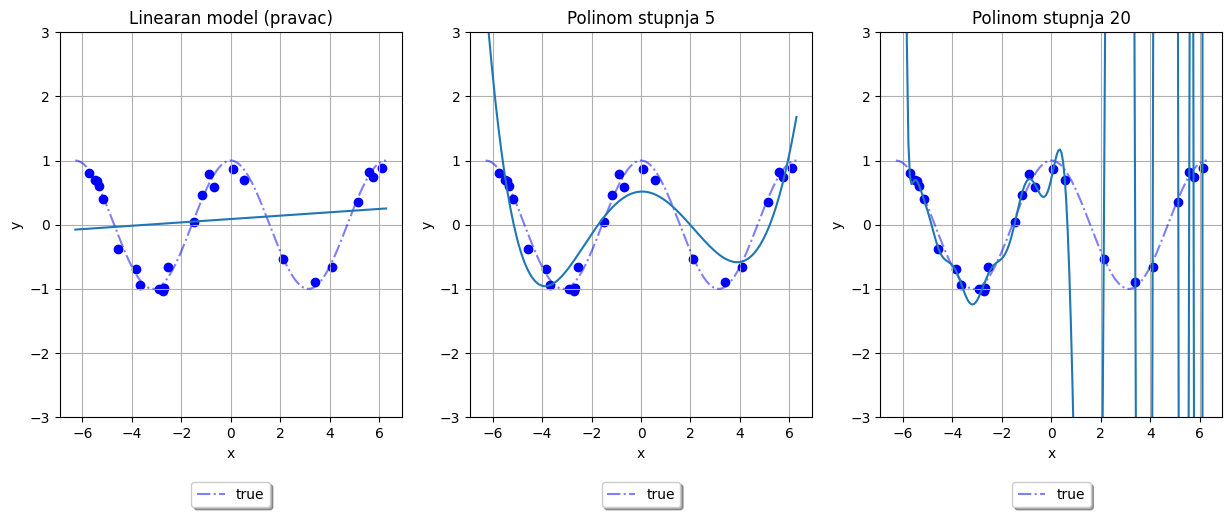

In [5]:
x_big_for_plot = np.linspace(-2*np.pi, 2*np.pi, 200)

def plot_data():
  plt.scatter(x_train, y_train, color='b')
  plt.plot(x_big_for_plot, np.cos(x_big_for_plot), 'b-.', label='true', alpha=0.5)

def applyPlotStyle(title):
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.ylim([-3,3])
  plt.title(title)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True, shadow=True)


plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#######################
####### Plot 1  #######
#######################

plt.subplot(131)
plot_data()

# 1.1. VAŠ KOD: prikažite dobiveni pravac
plt.plot(x_big_for_plot, line_regress.predict(x_big_for_plot.reshape(-1, 1)))

applyPlotStyle("Linearan model (pravac)")

#######################
####### Plot 2  #######
#######################

plt.subplot(132)
plot_data()

# 1.1. VAŠ KOD: prikažite dobiveni polinom stupnja 5
plt.plot(x_big_for_plot, mymodel_5(x_big_for_plot))

applyPlotStyle("Polinom stupnja 5")

#######################
####### Plot 3  #######
#######################

plt.subplot(133)
plot_data()

# 1.1. VAŠ KOD: prikažite dobiveni polinom stupnja 20

plt.plot(x_big_for_plot, mymodel_20(x_big_for_plot))

applyPlotStyle("Polinom stupnja 20")


plt.show()

# Zadatak 2

In [6]:
x_test = np.random.choice(np.linspace(-2*np.pi, 2*np.pi, 100), 20, replace=False).reshape(-1,1)
y_test = np.cos(x_test)

In [9]:
print("Evaluacija na skupu za treniranje:")

print("\nLinearna regresija:")
print("MSE: ", metrics.mean_squared_error(y_train, line_regress.predict(x_train)))
print("MAE: ", metrics.mean_absolute_error(y_train, line_regress.predict(x_train)))
print("RMSE: ", metrics.root_mean_squared_error(y_train, line_regress.predict(x_train)))

print("\nPoly 5 regresija:")
print("MSE: ", metrics.mean_squared_error(y_train, mymodel_5(x_train)))
print("MAE: ", metrics.mean_absolute_error(y_train, mymodel_5(x_train)))
print("RMSE: ", metrics.root_mean_squared_error(y_train, mymodel_5(x_train)))

print("\nPoly 20 regresija:")
print("MSE: ", metrics.mean_squared_error(y_train, mymodel_20(x_train)))
print("MAE: ", metrics.mean_absolute_error(y_train, mymodel_20(x_train)))
print("RMSE: ", metrics.root_mean_squared_error(y_train, mymodel_20(x_train)))

Evaluacija na skupu za treniranje:

Linearna regresija:
MSE:  0.5126731008905575
MAE:  0.6662718868399652
RMSE:  0.7160119418630931

Poly 5 regresija:
MSE:  0.10568199223480379
MAE:  0.2834000734621381
RMSE:  0.3250876685369714

Poly 20 regresija:
MSE:  0.002205299930980193
MAE:  0.027564629400544032
RMSE:  0.04696062106680653


In [14]:
print("Evaluacija na skupu za testiranje: \n")

print("Linearna regresija:")
print("MSE: ", metrics.mean_squared_error(y_test,line_regress.predict(x_test)))
print("MAE: ",metrics.mean_absolute_error(y_test,line_regress.predict(x_test)))
print("RMSE: ", metrics.root_mean_squared_error(y_test, line_regress.predict(x_test)))

print("\nPoly 5 regresija:")
print("MSE: ", metrics.mean_squared_error(y_test,mymodel_5(x_test)))
print("MAE: ",metrics.mean_absolute_error(y_test,mymodel_5(x_test)))
print("RMSE: ", metrics.root_mean_squared_error(y_test, mymodel_5(x_test)))

print("\nPoly 20 regresija:")
print("MSE: ", metrics.mean_squared_error(y_test,mymodel_20(x_test)))
print("MAE: ",metrics.mean_absolute_error(y_test,mymodel_20(x_test)))
print("RMSE: ", metrics.root_mean_squared_error(y_test, mymodel_20(x_test)))

Evaluacija na skupu za testiranje: 

Linearna regresija:
MSE:  0.685599818034138
MAE:  0.7637722536824663
RMSE:  0.828009551897886

Poly 5 regresija:
MSE:  0.16626522247460782
MAE:  0.36623661285000153
RMSE:  0.4077563273262695

Poly 20 regresija:
MSE:  150999.97959726828
MAE:  96.8261444606238
RMSE:  388.5871583020575


### 1. Linearna regresija nije dobar izbor jer pokušavamo pravcem aproksimirati periodičku krivulju, obzirom na to da je vrijednost funkcije sinus u intervalu od -1 do 1, srednja apsolutna greška od 0.76 je prilično visoka

### 2. Poly 5 regresija daje najbolje rezultate na testnom dijelu jer koristimo polinom za opisati krivulju, a model nije prenaučen što se može vidjeti iz blago pogoršane vrijednosti grešaka na testnom skupu u odnosu na skup za treniranje

### 3. Poly 20 regresija nije dobar izbor jer prenaučena na skupu za treniranje što možemo vidjeti iz sumnjivo niskih vrijednosti grešaka, dok su vrijednosti grešaka na skupu za testiranje epskih razmjera

# Zadatak 3

In [ ]:
np.random.seed(31)

num_points = 100

x_train = np.random.uniform(-2*np.pi, 2*np.pi, num_points).reshape(-1,1)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, num_points).reshape(-1,1)

In [20]:
np.random.seed(31)

num_points_large = 100

x_train_large = np.random.uniform(-2*np.pi, 2*np.pi, num_points_large).reshape(-1,1)
y_train_large = np.cos(x_train_large) + np.random.normal(0, 0.1, num_points_large).reshape(-1,1)

x_test_large = np.random.choice(np.linspace(-2*np.pi, 2*np.pi, 100), 20, replace=False).reshape(-1,1)
y_test_large = np.cos(x_test_large)

In [21]:

line_regress_large = LinearRegression()
line_regress_large.fit(x_train_large, y_train_large)

mymodel_5_large = np.poly1d(np.polyfit(x_train_large.flatten(), y_train_large.flatten(), 5))

mymodel_20_large = np.poly1d(np.polyfit(x_train_large.flatten(), y_train_large.flatten(), 20))

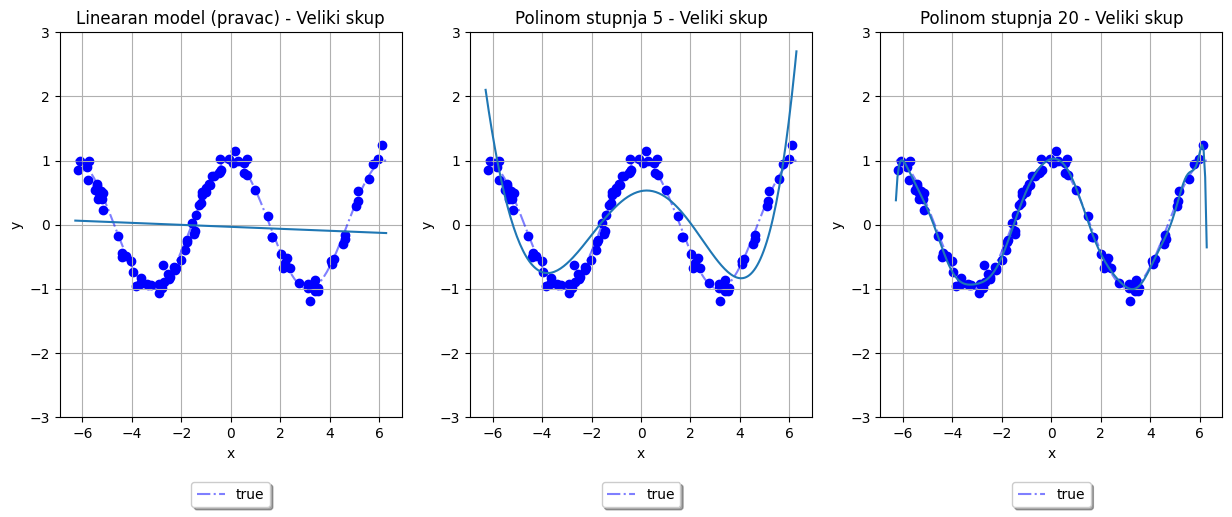

In [22]:
x_big_for_plot_large = np.linspace(-2*np.pi, 2*np.pi, 200)

def plot_data_large():
  plt.scatter(x_train_large, y_train_large, color='b')
  plt.plot(x_big_for_plot_large, np.cos(x_big_for_plot_large), 'b-.', label='true', alpha=0.5)

def applyPlotStyle_large(title):
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.ylim([-3,3])
  plt.title(title)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True, shadow=True)


plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#######################
####### Plot 1  #######
#######################

plt.subplot(131)
plot_data_large()

# 1.1. VAŠ KOD: prikažite dobiveni pravac
plt.plot(x_big_for_plot_large, line_regress_large.predict(x_big_for_plot_large.reshape(-1, 1)))

applyPlotStyle_large("Linearan model (pravac) - Veliki skup")

#######################
####### Plot 2  #######
#######################

plt.subplot(132)
plot_data_large()

# 1.1. VAŠ KOD: prikažite dobiveni polinom stupnja 5
plt.plot(x_big_for_plot_large, mymodel_5_large(x_big_for_plot_large))

applyPlotStyle_large("Polinom stupnja 5 - Veliki skup")

#######################
####### Plot 3  #######
#######################

plt.subplot(133)
plot_data_large()

# 1.1. VAŠ KOD: prikažite dobiveni polinom stupnja 20

plt.plot(x_big_for_plot_large, mymodel_20_large(x_big_for_plot_large))

applyPlotStyle_large("Polinom stupnja 20 - Veliki skup")


plt.show()

In [24]:
print("Evaluacija na skupu za treniranje (veliki skup):")

print("\nLinearna regresija:")
print("MSE: ", metrics.mean_squared_error(y_train_large, line_regress_large.predict(x_train_large)))
print("MAE: ", metrics.mean_absolute_error(y_train_large, line_regress_large.predict(x_train_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_train_large, line_regress_large.predict(x_train_large)))

print("\nPoly 5 regresija:")
print("MSE: ", metrics.mean_squared_error(y_train_large, mymodel_5_large(x_train_large)))
print("MAE: ", metrics.mean_absolute_error(y_train_large, mymodel_5_large(x_train_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_train_large, mymodel_5_large(x_train_large)))

print("\nPoly 20 regresija:")
print("MSE: ", metrics.mean_squared_error(y_train_large, mymodel_20_large(x_train_large)))
print("MAE: ", metrics.mean_absolute_error(y_train_large, mymodel_20_large(x_train_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_train_large, mymodel_20_large(x_train_large)))

Evaluacija na skupu za treniranje (veliki skup):

Linearna regresija:
MSE:  0.5155855188500476
MAE:  0.6528299104026177
RMSE:  0.718042839146835

Poly 5 regresija:
MSE:  0.14410147141607701
MAE:  0.3372190968036815
RMSE:  0.37960699600518033

Poly 20 regresija:
MSE:  0.0066755725866635175
MAE:  0.06229854157541797
RMSE:  0.08170417729016992


In [25]:
print("Evaluacija na skupu za testiranje (veliki skup): \n")

print("Linearna regresija:")
print("MSE: ", metrics.mean_squared_error(y_test_large,line_regress_large.predict(x_test_large)))
print("MAE: ",metrics.mean_absolute_error(y_test_large,line_regress_large.predict(x_test_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_test_large, line_regress_large.predict(x_test_large)))

print("\nPoly 5 regresija:")
print("MSE: ", metrics.mean_squared_error(y_test_large,mymodel_5_large(x_test_large)))
print("MAE: ",metrics.mean_absolute_error(y_test_large,mymodel_5_large(x_test_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_test_large, mymodel_5_large(x_test_large)))

print("\nPoly 20 regresija:")
print("MSE: ", metrics.mean_squared_error(y_test_large,mymodel_20_large(x_test_large)))
print("MAE: ",metrics.mean_absolute_error(y_test_large,mymodel_20_large(x_test_large)))
print("RMSE: ", metrics.root_mean_squared_error(y_test_large, mymodel_20_large(x_test_large)))

Evaluacija na skupu za testiranje (veliki skup): 

Linearna regresija:
MSE:  0.49052381923555927
MAE:  0.6143791746291389
RMSE:  0.7003740566551272

Poly 5 regresija:
MSE:  0.16704561325700393
MAE:  0.3666314032009358
RMSE:  0.4087121398453977

Poly 20 regresija:
MSE:  0.002899825095351261
MAE:  0.04866924530288723
RMSE:  0.053850024097963606


### 1. Učetverostručenje broja točaka nije značajno utjecalo na rezultate linearne regresije i Poly 5 regresije

### 2. Budući da je funkcija sinus koju pokušavamo aproksimirati periodička, veći broj točaka u skupu za treniranje pozitivno je utjecao na rezultate metrika na testnom skupu koje su postale gotovo zanemarive

# Zadatak 4

In [27]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

try:
  housing_df = pd.read_csv('/content/drive/My Drive/housing.csv')
  print("housing.csv loaded successfully!")
  display(housing_df.head())
except FileNotFoundError:
  print("Error: housing.csv not found. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
housing.csv loaded successfully!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing_df_imputed = housing_df
housing_df_imputed['total_bedrooms'] = housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median())
housing_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
housing_df_imputed = housing_df_imputed.drop_duplicates()
housing_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
housing_df_imputed = pd.get_dummies(housing_df_imputed, columns=['ocean_proximity'])
display(housing_df_imputed.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [67]:
scaler = StandardScaler()

numerical_cols_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

housing_df_scaled = housing_df_imputed.copy()
housing_df_scaled[numerical_cols_to_scale] = scaler.fit_transform(housing_df_scaled[numerical_cols_to_scale])

display(housing_df_scaled.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,452600.0,False,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,358500.0,False,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,352100.0,False,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,341300.0,False,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,False,False,False,True,False


In [66]:
from sklearn.model_selection import train_test_split

X = housing_df_scaled.drop('median_house_value', axis=1)
y = housing_df_imputed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16512, 13)
X_test: (4128, 13)
y_train: (16512,)
y_test: (4128,)


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

print("\nEvaluacija na testnom skupu:")
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_poly))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("RMSE: ", metrics.root_mean_squared_error(y_test, y_pred_poly))


Evaluacija na testnom skupu:
MSE:  9403236129.971706
MAE:  43349.51014720204
RMSE:  96970.28477823352


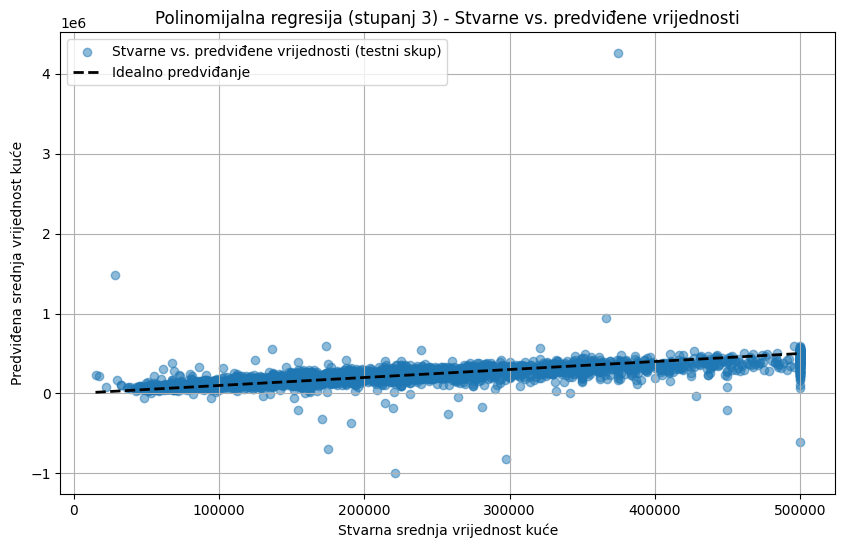

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Stvarne vs. predviđene vrijednosti (testni skup)')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Idealno predviđanje')

plt.xlabel("Stvarna srednja vrijednost kuće")
plt.ylabel("Predviđena srednja vrijednost kuće")
plt.title("Polinomijalna regresija (stupanj 3) - Stvarne vs. predviđene vrijednosti")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_ocean_multi = housing_df['ocean_proximity']

numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X_ocean_multi = housing_df_scaled[numerical_cols]


X_train_ocean_multi, X_test_ocean_multi, y_train_ocean_multi, y_test_ocean_multi = train_test_split(X_ocean_multi, y_ocean_multi, test_size=0.2, random_state=42)

logistic_reg_multi = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_reg_multi.fit(X_train_ocean_multi, y_train_ocean_multi)

LogisticRegression(max_iter=1000)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_ocean_multi = logistic_reg_multi.predict(X_test_ocean_multi)

print("Evaluacija višeklasne logističke regresije na testnom skupu")

accuracy_multi = accuracy_score(y_test_ocean_multi, y_pred_ocean_multi)
conf_matrix_multi = confusion_matrix(y_test_ocean_multi, y_pred_ocean_multi)
class_report_multi = classification_report(y_test_ocean_multi, y_pred_ocean_multi)

print(f"\nTočnost: {accuracy_multi:.4f}")

print("\nMatrica konfuzije:")
print(conf_matrix_multi)

print("\nIzvješće o klasifikaciji:")
print(class_report_multi)


Evaluacija višeklasne logističke regresije na testnom skupu

Točnost: 0.7960

Matrica konfuzije:
[[1649   18    0   75   53]
 [ 103 1210    0   10    1]
 [   0    0    0    0    1]
 [ 101    2    0  333    0]
 [ 367   18    0   93   94]]

Izvješće o klasifikaciji:
              precision    recall  f1-score   support

   <1H OCEAN       0.74      0.92      0.82      1795
      INLAND       0.97      0.91      0.94      1324
      ISLAND       0.00      0.00      0.00         1
    NEAR BAY       0.65      0.76      0.70       436
  NEAR OCEAN       0.63      0.16      0.26       572

    accuracy                           0.80      4128
   macro avg       0.60      0.55      0.55      4128
weighted avg       0.79      0.80      0.77      4128



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


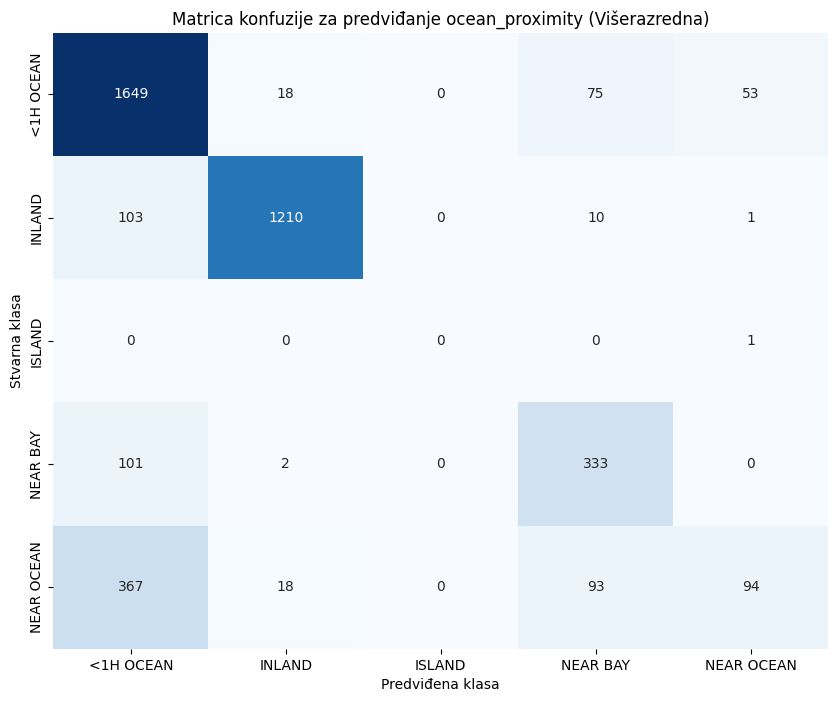

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_multi, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logistic_reg_multi.classes_,
            yticklabels=logistic_reg_multi.classes_)

plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije za predviđanje ocean_proximity (Višerazredna)')
plt.show()